# The Importance of Data Cleaning and Visualization
## Data Cleaning
Data cleaning is the process of identifying and correcting errors, inconsistencies, or inaccuracies in datasets to ensure reliable analysis. This step is crucial because:

Accuracy: Clean data minimizes errors and biases, ensuring the insights derived are reliable and actionable.
Efficiency: By removing redundancies, irrelevant information, and inaccuracies, analysis becomes faster and more focused.
Trustworthiness: Clean data builds confidence among stakeholders, making decisions based on it more credible.
Data Visualization

## Data visualization involves representing data graphically to make complex information easy to understand. It is important because:

Clarity: Visualization simplifies large datasets, highlighting patterns, trends, and outliers effectively.
Actionable Insights: It helps decision-makers quickly grasp key insights and take informed actions.
Engagement: Well-designed visuals are more engaging and persuasive than raw data tables, improving communication across teams.
Together, data cleaning ensures the foundation is strong, while visualization transforms the cleaned data into meaningful narratives that drive impactful decisions.

# Libraries

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Ignore the warnings
import warnings                  
warnings.filterwarnings("ignore")


In [150]:
# Read the data from CSV file
df = pd.read_csv("C:/Users/HP/Downloads/inu_neko_orderline_clean.csv")
df.head()

,trans_id,prod_upc,cust_id,trans_timestamp,trans_year,trans_month,trans_day,trans_hour,trans_quantity,cust_age,cust_state,prod_price,prod_title,prod_category,prod_animal_type,total_sales
0,10300097,719638485153,1001019,2021-01-01 07:35:21.439873,2021,1,1,1,1,20,New York,72.99,Cat Cave,bedding,cat,72.99
1,10300093,73201504044,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,18.95,Purrfect Puree,treat,cat,18.95
2,10300093,719638485153,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,72.99,Cat Cave,bedding,cat,72.99
3,10300093,441530839394,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,2,34,New York,28.45,Ball and String,toy,cat,56.90
4,10300093,733426809698,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,18.95,Yum Fish-Dish,food,cat,18.95


In [152]:
#descriptive statistics of the data
df.describe()

,trans_id,prod_upc,cust_id,trans_year,trans_month,trans_day,trans_hour,trans_quantity,cust_age,prod_price,total_sales
count,3.822300e+04,3.822300e+04,3.822300e+04,38223.0,38223.000000,38223.000000,38223.000000,38223.000000,38223.000000,38223.000000,38223.000000
mean,1.031407e+07,5.004289e+11,1.010657e+06,2021.0,4.611124,16.615964,16.615964,1.374277,30.062109,30.541081,42.107863
std,8.076082e+03,2.586271e+11,6.117267e+03,0.0,1.387674,8.721896,8.721896,0.713710,6.956725,18.729653,36.614296
min,1.030009e+07,7.320150e+10,1.001012e+06,2021.0,1.000000,1.000000,1.000000,1.000000,18.000000,9.950000,9.950000
25%,1.030707e+07,3.445389e+11,1.005254e+06,2021.0,4.000000,9.000000,9.000000,1.000000,25.000000,18.950000,18.950000
50%,1.031407e+07,4.697572e+11,1.010222e+06,2021.0,5.000000,17.000000,17.000000,1.000000,29.000000,21.950000,32.910000
75%,1.032106e+07,7.196385e+11,1.015806e+06,2021.0,6.000000,24.000000,24.000000,2.000000,34.000000,45.990000,54.950000
max,1.032811e+07,9.695689e+11,1.022252e+06,2021.0,6.000000,31.000000,31.000000,8.000000,79.000000,72.990000,510.930000


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38223 entries, 0 to 38222
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trans_id          38223 non-null  int64  
 1   prod_upc          38223 non-null  int64  
 2   cust_id           38223 non-null  int64  
 3   trans_timestamp   38223 non-null  object 
 4   trans_year        38223 non-null  int64  
 5   trans_month       38223 non-null  int64  
 6   trans_day         38223 non-null  int64  
 7   trans_hour        38223 non-null  int64  
 8   trans_quantity    38223 non-null  int64  
 9   cust_age          38223 non-null  int64  
 10  cust_state        38223 non-null  object 
 11  prod_price        38223 non-null  float64
 12  prod_title        38223 non-null  object 
 13  prod_category     38223 non-null  object 
 14  prod_animal_type  38223 non-null  object 
 15  total_sales       38223 non-null  float64
dtypes: float64(2), int64(9), object(5)
memor

In [156]:
# Read columns and check their names 
df = pd.DataFrame(df)
df.head()
column_list = list(df.columns)
column_list


['trans_id',
 'prod_upc',
 'cust_id',
 'trans_timestamp',
 'trans_year',
 'trans_month',
 'trans_day',
 'trans_hour',
 'trans_quantity',
 'cust_age',
 'cust_state',
 'prod_price',
 'prod_title',
 'prod_category',
 'prod_animal_type',
 'total_sales']

In [158]:
# Drop column that is not needed in the analysis
df.drop(columns="prod_upc", inplace=True)
df.head()


,trans_id,cust_id,trans_timestamp,trans_year,trans_month,trans_day,trans_hour,trans_quantity,cust_age,cust_state,prod_price,prod_title,prod_category,prod_animal_type,total_sales
0,10300097,1001019,2021-01-01 07:35:21.439873,2021,1,1,1,1,20,New York,72.99,Cat Cave,bedding,cat,72.99
1,10300093,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,18.95,Purrfect Puree,treat,cat,18.95
2,10300093,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,72.99,Cat Cave,bedding,cat,72.99
3,10300093,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,2,34,New York,28.45,Ball and String,toy,cat,56.90
4,10300093,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,18.95,Yum Fish-Dish,food,cat,18.95


In [160]:
#creating the age group variable to the dataset
df['Age Group'] = pd.cut(df['cust_age'], bins=[0, 18, 25, 35, 45, 55, 65, float('inf')],
                        labels=['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'],
                        include_lowest=True)
df.head()

,trans_id,cust_id,trans_timestamp,trans_year,trans_month,trans_day,trans_hour,trans_quantity,cust_age,cust_state,prod_price,prod_title,prod_category,prod_animal_type,total_sales,Age Group
0,10300097,1001019,2021-01-01 07:35:21.439873,2021,1,1,1,1,20,New York,72.99,Cat Cave,bedding,cat,72.99,18-24
1,10300093,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,18.95,Purrfect Puree,treat,cat,18.95,25-34
2,10300093,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,72.99,Cat Cave,bedding,cat,72.99,25-34
3,10300093,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,2,34,New York,28.45,Ball and String,toy,cat,56.90,25-34
4,10300093,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,18.95,Yum Fish-Dish,food,cat,18.95,25-34


In [162]:
#checking for any N/A values
df.isna().sum()


trans_id            0
cust_id             0
trans_timestamp     0
trans_year          0
trans_month         0
trans_day           0
trans_hour          0
trans_quantity      0
cust_age            0
cust_state          0
prod_price          0
prod_title          0
prod_category       0
prod_animal_type    0
total_sales         0
Age Group           0
dtype: int64

In [164]:
#reviewing the dataset 
df.describe()


,trans_id,cust_id,trans_year,trans_month,trans_day,trans_hour,trans_quantity,cust_age,prod_price,total_sales
count,3.822300e+04,3.822300e+04,38223.0,38223.000000,38223.000000,38223.000000,38223.000000,38223.000000,38223.000000,38223.000000
mean,1.031407e+07,1.010657e+06,2021.0,4.611124,16.615964,16.615964,1.374277,30.062109,30.541081,42.107863
std,8.076082e+03,6.117267e+03,0.0,1.387674,8.721896,8.721896,0.713710,6.956725,18.729653,36.614296
min,1.030009e+07,1.001012e+06,2021.0,1.000000,1.000000,1.000000,1.000000,18.000000,9.950000,9.950000
25%,1.030707e+07,1.005254e+06,2021.0,4.000000,9.000000,9.000000,1.000000,25.000000,18.950000,18.950000
50%,1.031407e+07,1.010222e+06,2021.0,5.000000,17.000000,17.000000,1.000000,29.000000,21.950000,32.910000
75%,1.032106e+07,1.015806e+06,2021.0,6.000000,24.000000,24.000000,2.000000,34.000000,45.990000,54.950000
max,1.032811e+07,1.022252e+06,2021.0,6.000000,31.000000,31.000000,8.000000,79.000000,72.990000,510.930000


In [166]:
df.describe(include='O')

,trans_timestamp,cust_state,prod_title,prod_category,prod_animal_type
count,38223,38223,38223,38223,38223
unique,28022,51,21,4,2
top,2021-06-14 10:37:24.447862,New York,Reddy Beddy,treat,cat
freq,7,10486,4734,11246,21944


## Visualization

In [168]:
df.columns

Index(['trans_id', 'cust_id', 'trans_timestamp', 'trans_year', 'trans_month',
       'trans_day', 'trans_hour', 'trans_quantity', 'cust_age', 'cust_state',
       'prod_price', 'prod_title', 'prod_category', 'prod_animal_type',
       'total_sales', 'Age Group'],
      dtype='object')

<Axes: title={'center': 'Sales Trends'}, xlabel='trans_month'>

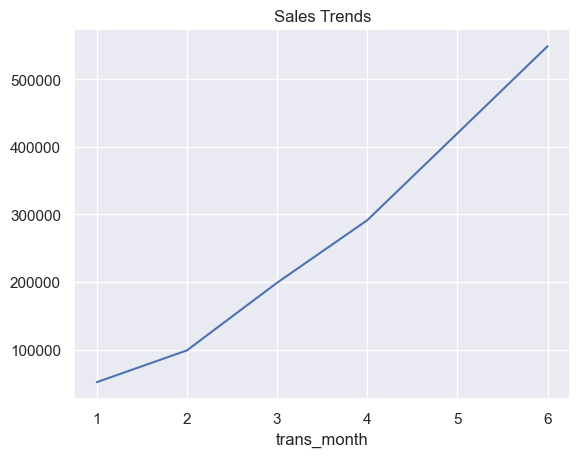

In [170]:
# Sales trends
df.groupby('trans_month')['total_sales'].sum().plot(kind='line', title='Sales Trends')

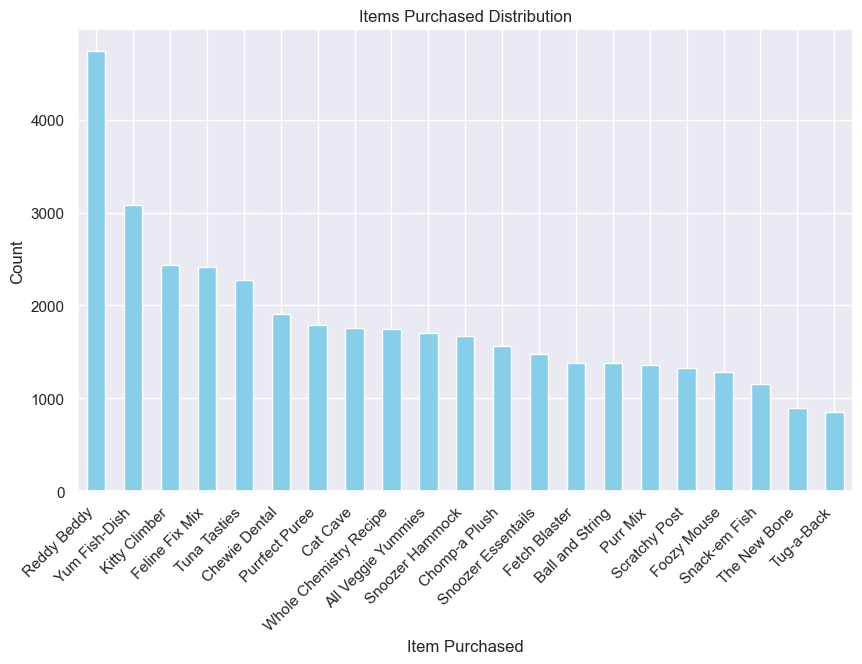

In [172]:
#creating the BAR chart for Purchased items
item_counts = df['prod_title'].value_counts()
plt.figure(figsize=(10, 6))
item_counts.plot(kind='bar', color='skyblue')
plt.title('Items Purchased Distribution')
plt.xlabel('Item Purchased')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()


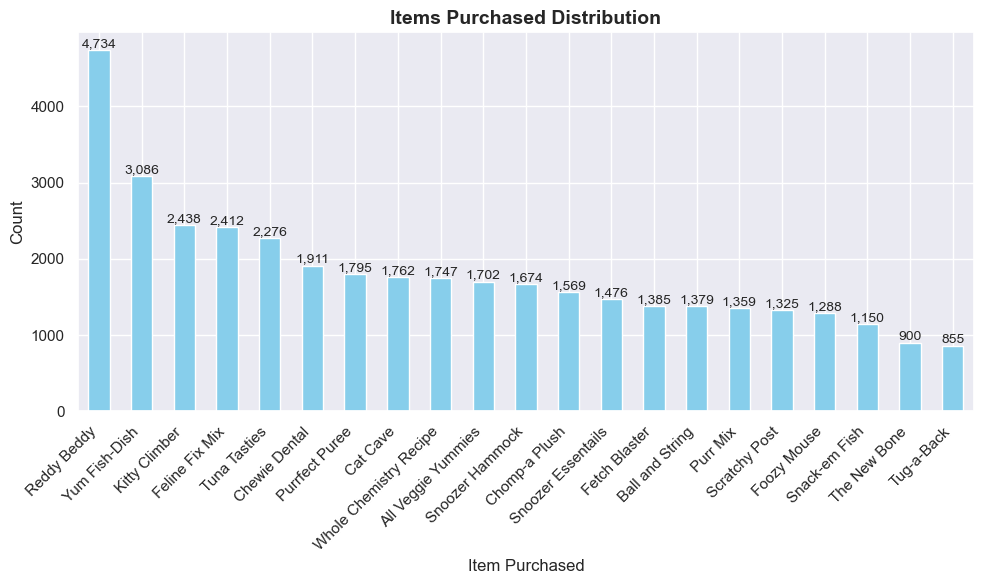

In [174]:
# Create the bar chart for purchased items
item_counts = df['prod_title'].value_counts()

# Create the plot
plt.figure(figsize=(10, 6))
bars = item_counts.plot(kind='bar', color='skyblue')

# Annotate each bar with the count value
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position of the text
        bar.get_height() + 0.5,  # Y position of the text (above the bar)
        f'{bar.get_height():,.0f}',  # Format the number
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=10
    )

# Add titles and labels
plt.title('Items Purchased Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Item Purchased', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability

# Show the plot
plt.tight_layout()  # Ensure everything fits without overlap
plt.show()

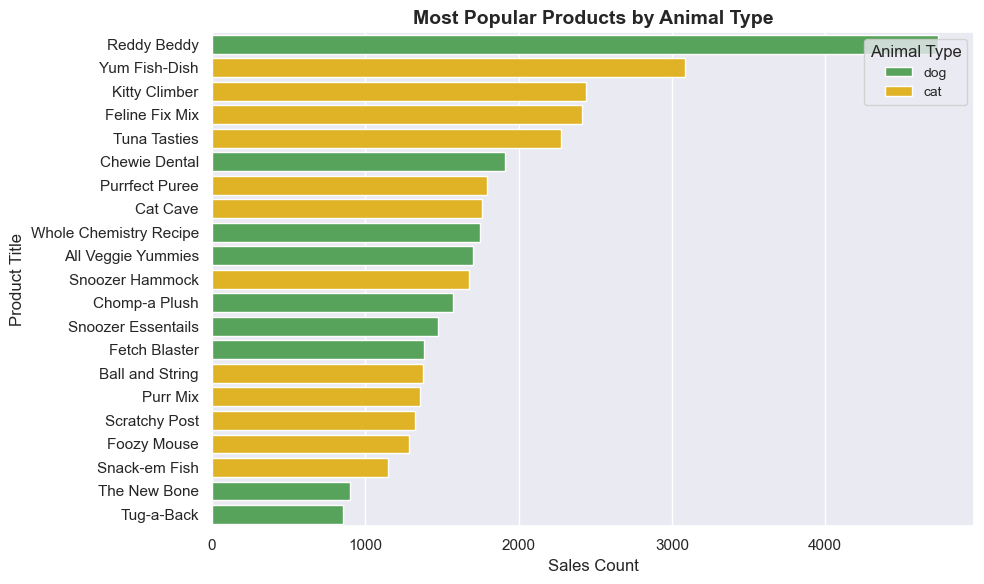

In [182]:
# Group by prod_animal_type and prod_title, count occurrences, and sort in descending order
product_counts = (
    df.groupby(["prod_animal_type", "prod_title"])
    .size()
    .reset_index(name="Count")
    .sort_values(by="Count", ascending=False)
)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    data=product_counts,
    x="Count",
    y="prod_title",
    hue="prod_animal_type",
    palette={"dog": "#4CAF50", "cat": "#FFC107"}
)

# Add labels and title
plt.title("Most Popular Products by Animal Type", fontsize=14, fontweight="bold")
plt.xlabel("Sales Count", fontsize=12)
plt.ylabel("Product Title", fontsize=12)
plt.legend(title="Animal Type", fontsize=10, loc="upper right")

# Adjust layout and display
plt.tight_layout()
plt.show()

In [184]:
# Get the most popular product for each animal type
most_popular = product_counts.loc[product_counts.groupby("prod_animal_type")["Count"].idxmax()]

# Print the results
for _, row in most_popular.iterrows():
    print(f"The most popular product for {row['prod_animal_type']}s is '{row['prod_title']}' with {row['Count']} sales.")

The most popular product for cats is 'Yum Fish-Dish' with 3086 sales.
The most popular product for dogs is 'Reddy Beddy' with 4734 sales.


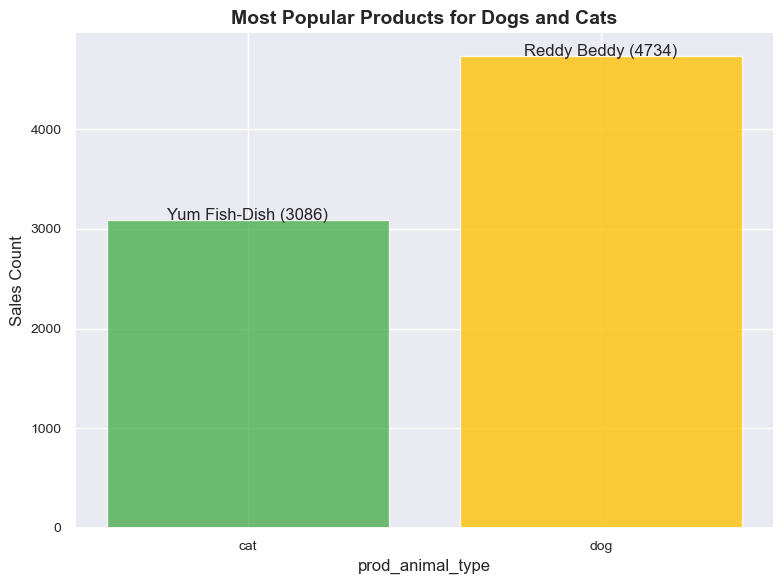

In [186]:
# Visualization
plt.figure(figsize=(8, 6))
plt.bar(most_popular["prod_animal_type"], most_popular["Count"], color=["#4CAF50", "#FFC107"], alpha=0.8)

# Annotate the chart
for i, row in most_popular.iterrows():
    plt.text(row["prod_animal_type"], row["Count"] + 0.1, f"{row['prod_title']} ({row['Count']})", ha="center", fontsize=12)

# Chart labels and title
plt.title("Most Popular Products for Dogs and Cats", fontsize=14, fontweight="bold")
plt.xlabel("prod_animal_type", fontsize=12)
plt.ylabel("Sales Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the chart
plt.tight_layout()
plt.show()

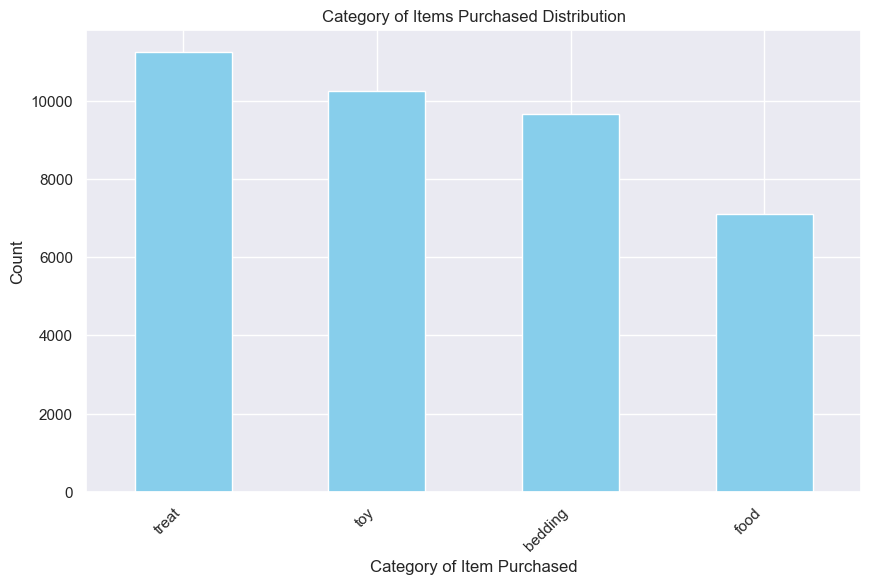

In [178]:
#creating the BAR chart for Purchased items
item_counts = df['prod_category'].value_counts()
plt.figure(figsize=(10, 6))
item_counts.plot(kind='bar', color='skyblue')
plt.title('Category of Items Purchased Distribution')
plt.xlabel('Category of Item Purchased')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

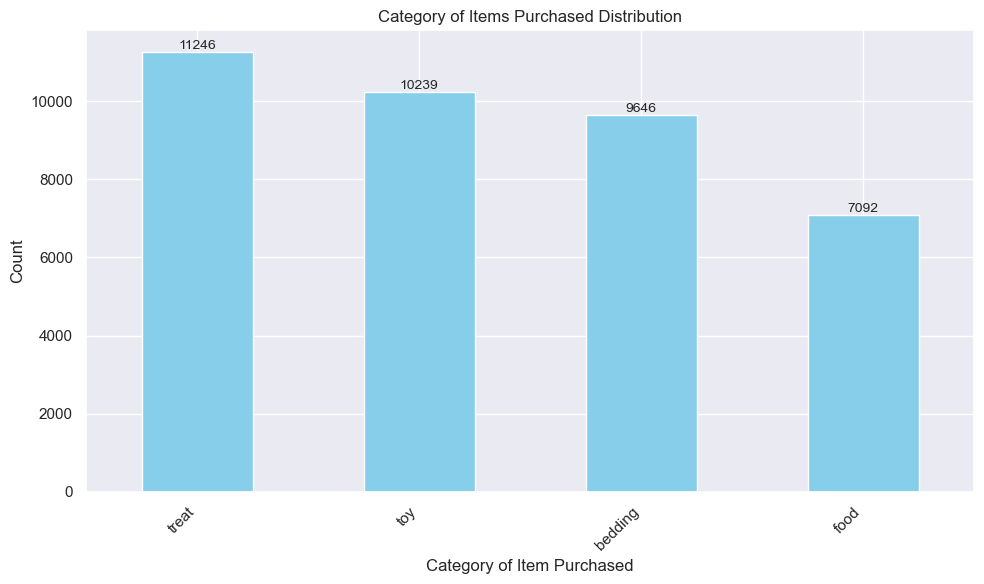

In [180]:
# Creating the bar chart for Purchased items by product category
item_counts = df['prod_category'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = item_counts.plot(kind='bar', color='skyblue')

# Add the number labels on top of each bar
for index, value in enumerate(item_counts):
    plt.text(
        index,  # X position of the text
        value + 0.1,  # Y position (slightly above the bar)
        str(value),  # The value to be displayed
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=10
    )

# Adding title and labels
plt.title('Category of Items Purchased Distribution')
plt.xlabel('Category of Item Purchased')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability

# Show the plot
plt.tight_layout()  # Ensure the layout is well-adjusted
plt.show()

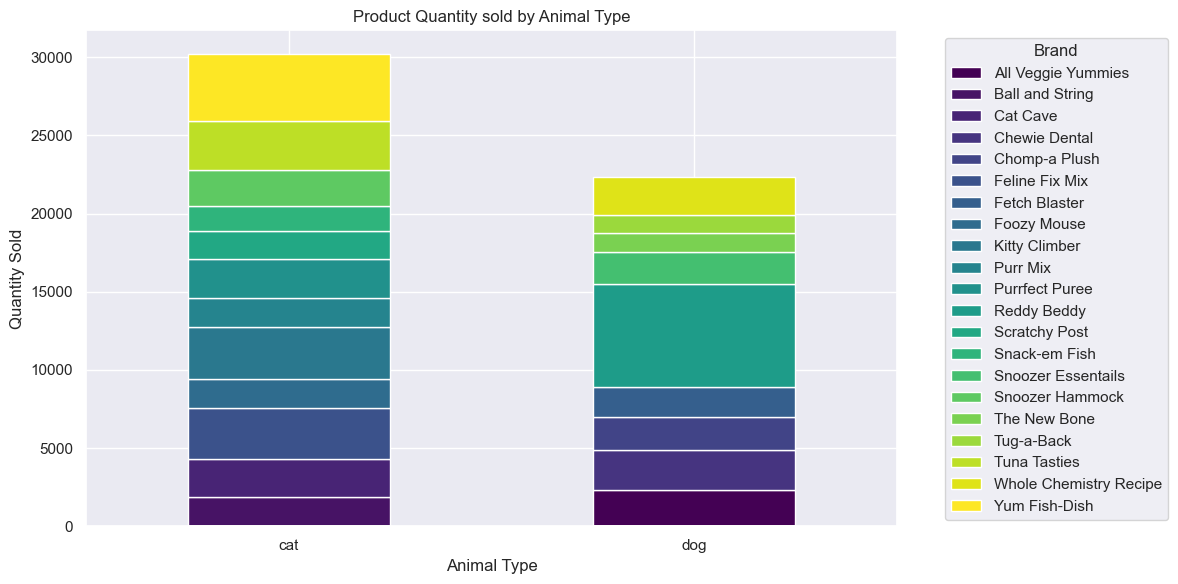

In [96]:
# visualizing most popular products sold by animal type
preferred_products= df.groupby(['prod_animal_type', 'prod_title'])['trans_quantity'].sum().unstack()


# Visualization: Brand Preferences by Education Level
preferred_products.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Product Quantity sold by Animal Type")
plt.xlabel("Animal Type")
plt.ylabel("Quantity Sold")
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

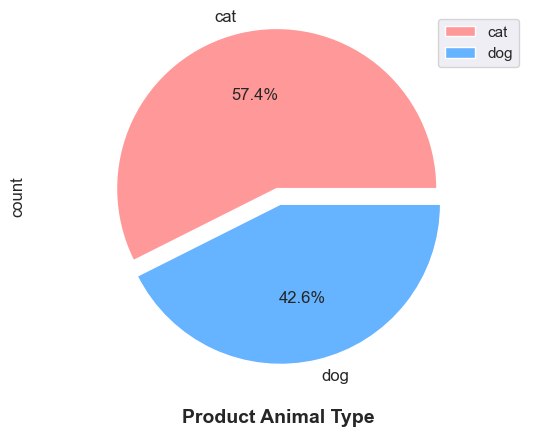

In [35]:
#creating a pie chart for Animal type for which items where purchased
#libraries for colors for visuals 
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', 'lightcoral', 'lightskyblue', 'gold']

counts = df["prod_animal_type"].value_counts()
explode = (0, 0.1)

counts.plot(kind='pie', fontsize=12, explode=explode, autopct='%1.1f%%', colors=colors)
plt.xlabel('Product Animal Type', weight="bold", fontsize=14, labelpad=20)
plt.axis('equal')
plt.legend(labels=counts.index, loc="best")
plt.show()


Text(0.5, 1.0, 'Product Category')

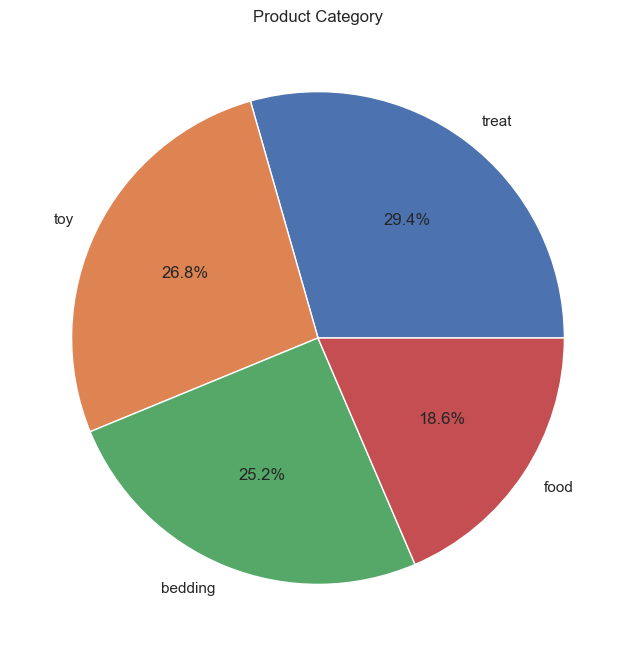

In [49]:
#creating a pie chart product type 
sns.set_style('darkgrid')
plt.figure(figsize=(8,8))
plt.pie(df['prod_category'].value_counts(), labels = df['prod_category'].value_counts().index, autopct='%1.1f%%')
plt.title('Product Category')


Revenue by Animal Type:
 prod_animal_type
cat    884528.60
dog    724960.26
Name: total_sales, dtype: float64


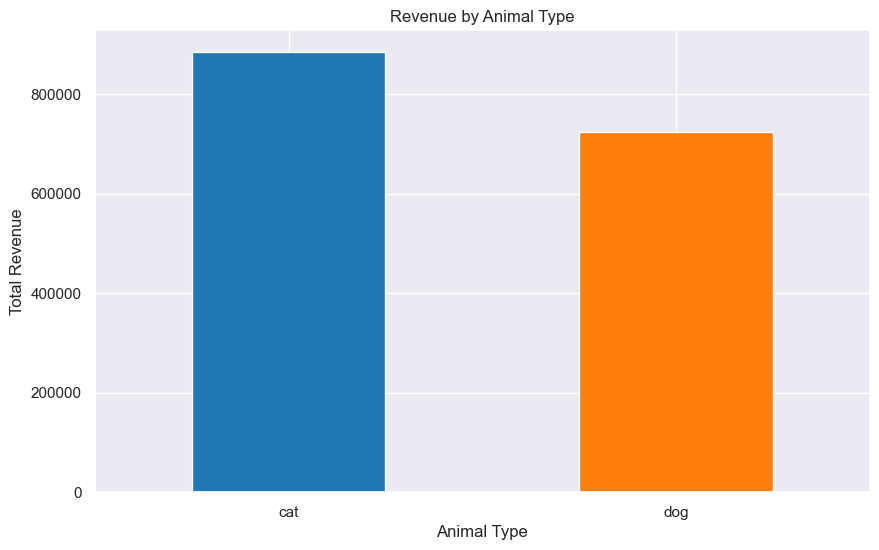

In [73]:
# Calculate revenue by Animal Type
Animal_type_revenue = df.groupby(['prod_animal_type'])['total_sales'].sum()

# Print results
print("Revenue by Animal Type:\n", Animal_type_revenue)

# Visualization
Animal_type_revenue.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title("Revenue by Animal Type")
plt.xlabel("Animal Type")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.show()

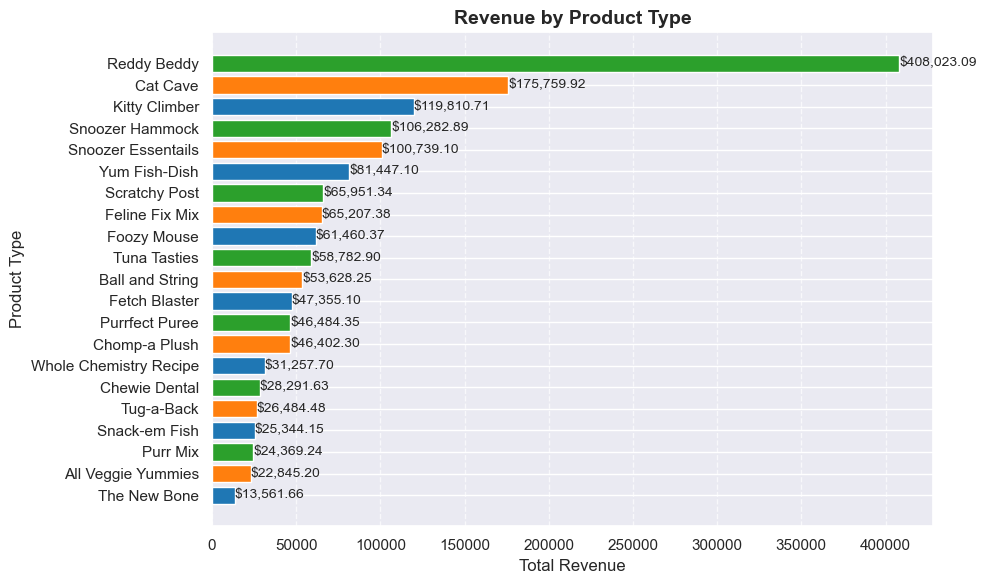

In [188]:
# Calculate revenue by Product title
product_type_revenue = df.groupby(['prod_title'])['total_sales'].sum()

# Sort values for better display
product_type_revenue_sorted = product_type_revenue.sort_values(ascending=True)

# Visualization: Horizontal Bar Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(
    product_type_revenue_sorted.index,
    product_type_revenue_sorted.values,
    color=['#1f77b4', '#ff7f0e', '#2ca02c']
)

# Annotate each bar with its value
for bar in bars:
    plt.text(
        bar.get_width(),  # Position of the text
        bar.get_y() + bar.get_height() / 2,  # Center the text on the bar
        f"${bar.get_width():,.2f}",  # Format the value
        va="center",  # Vertical alignment
        ha="left",  # Horizontal alignment
        fontsize=10
    )

# Add title and labels
plt.title("Revenue by Product Type", fontsize=14, fontweight="bold")
plt.xlabel("Total Revenue", fontsize=12)
plt.ylabel("Product Type", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()

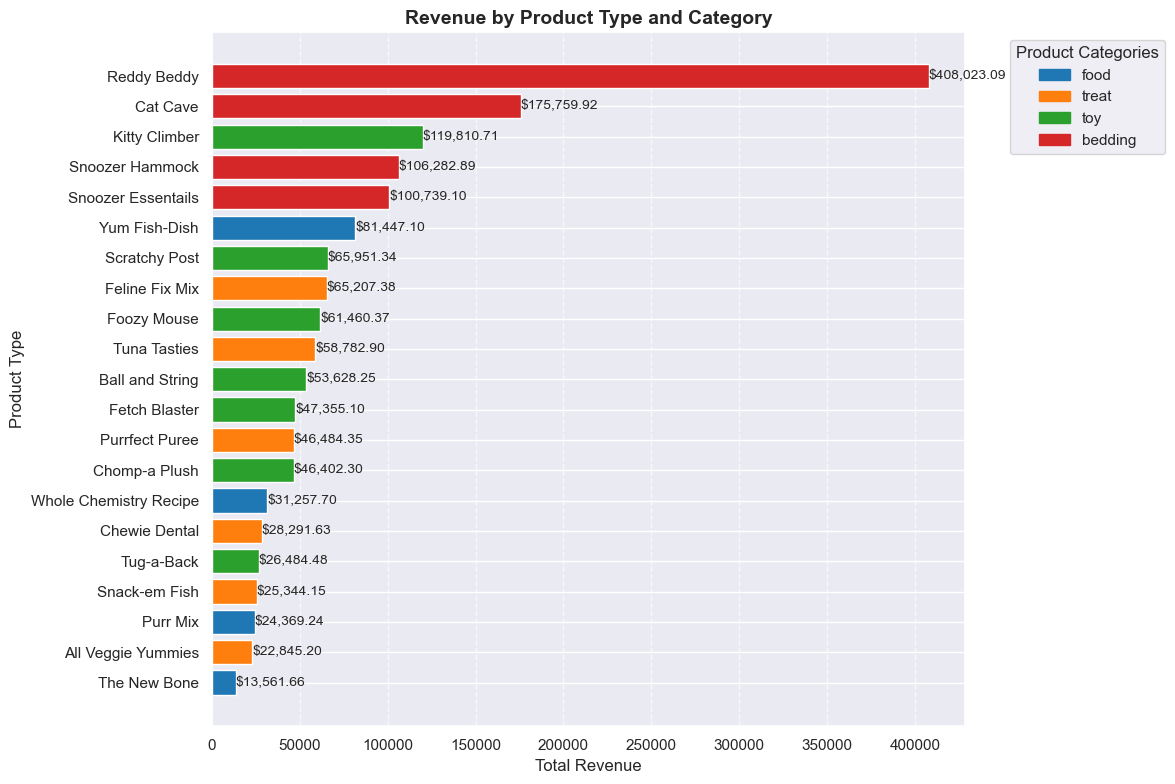

In [134]:
# Calculate revenue by Product title and category
products_type_revenue = df.groupby(['prod_title', 'prod_category'])['total_sales'].sum().reset_index()

# Sort values for better display
products_type_revenue_sorted = products_type_revenue.sort_values(by='total_sales', ascending=True)

# Create a color mapping for categories
categories = products_type_revenue_sorted['prod_category'].unique()
category_colors = {category: color for category, color in zip(categories, plt.cm.tab10.colors)}

# Visualization: Horizontal Bar Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(
    products_type_revenue_sorted['prod_title'],
    products_type_revenue_sorted['total_sales'],
    color=products_type_revenue_sorted['prod_category'].map(category_colors)
)

# Annotate each bar with its value
for bar, total_sales in zip(bars, products_type_revenue_sorted['total_sales']):
    plt.text(
        total_sales,  # Position of the text
        bar.get_y() + bar.get_height() / 2,  # Center the text on the bar
        f"${total_sales:,.2f}",  # Format the value
        va="center",  # Vertical alignment
        ha="left",  # Horizontal alignment
        fontsize=10
    )

# Add a legend for categories
handles = [plt.Rectangle((0, 0), 1, 1, color=category_colors[cat]) for cat in categories]
plt.legend(handles, categories, title="Product Categories", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add title and labels
plt.title("Revenue by Product Type and Category", fontsize=14, fontweight="bold")
plt.xlabel("Total Revenue", fontsize=12)
plt.ylabel("Product Type", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()

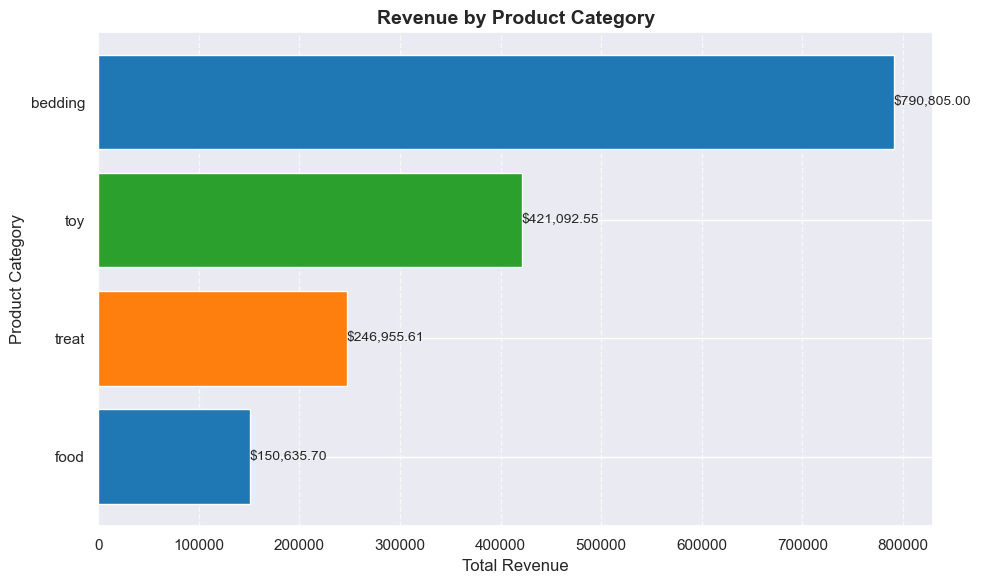

In [118]:
# Calculate revenue by Product title
product_cat_revenue = df.groupby(['prod_category'])['total_sales'].sum()

# Sort values for better display
product_cat_revenue_sorted = product_cat_revenue.sort_values(ascending=True)

# Visualization: Horizontal Bar Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(
    product_cat_revenue_sorted.index,
    product_cat_revenue_sorted.values,
    color=['#1f77b4', '#ff7f0e', '#2ca02c']
)

# Annotate each bar with its value
for bar in bars:
    plt.text(
        bar.get_width(),  # Position of the text
        bar.get_y() + bar.get_height() / 2,  # Center the text on the bar
        f"${bar.get_width():,.2f}",  # Format the value
        va="center",  # Vertical alignment
        ha="left",  # Horizontal alignment
        fontsize=10
    )

# Add title and labels
plt.title("Revenue by Product Category", fontsize=14, fontweight="bold")
plt.xlabel("Total Revenue", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [108]:
df.columns

Index(['trans_id', 'cust_id', 'trans_timestamp', 'trans_year', 'trans_month',
       'trans_day', 'trans_hour', 'trans_quantity', 'cust_age', 'cust_state',
       'prod_price', 'prod_title', 'prod_category', 'prod_animal_type',
       'total_sales', 'Age Group', 'Animal_label', 'Product_category_label'],
      dtype='object')

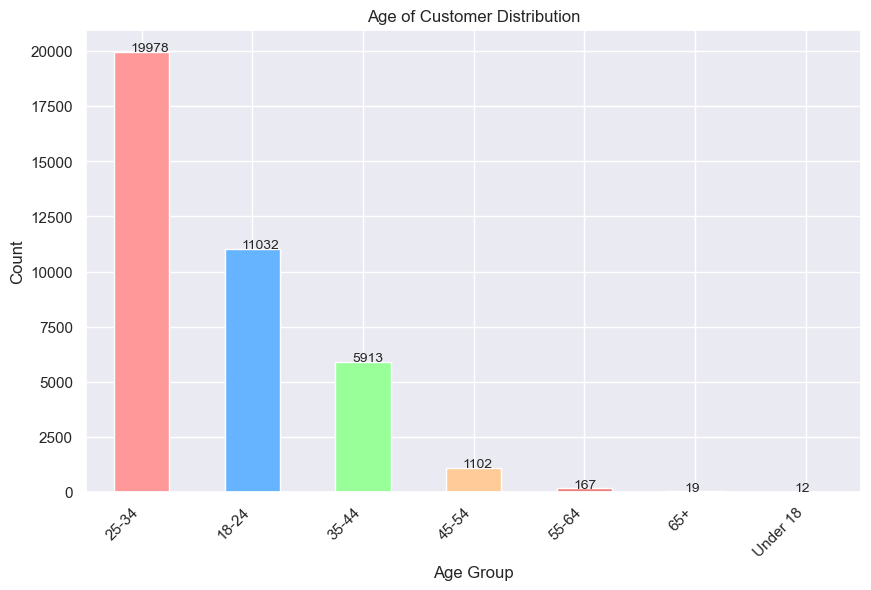

In [98]:
#creating the barchart by Age group distribution
age_group_counts = df['Age Group'].value_counts()

plt.figure(figsize=(10, 6))
bars = age_group_counts.plot(kind='bar', color=colors)

for bar, count in zip(bars.patches, age_group_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05, str(count), fontsize=10)

plt.title('Age of Customer Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()


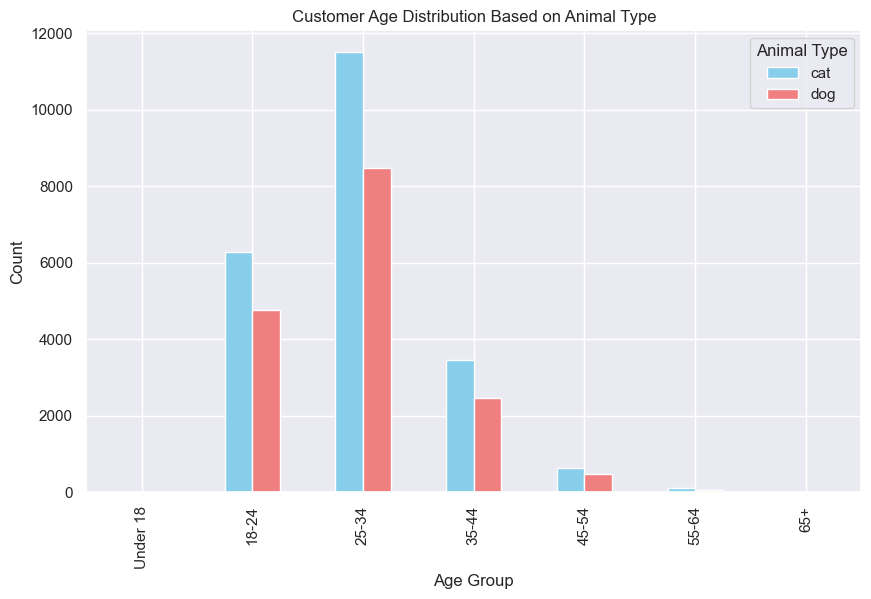

In [100]:
#creating the barchart with Age Group Distribution based on Animal Type
pivot_df = df.pivot_table(index='Age Group', columns='prod_animal_type', aggfunc='size', fill_value=0)

# Plot grouped bar chart
ax = pivot_df.plot(kind='bar', color=['skyblue', 'lightcoral'], figsize=(10, 6))

ax.set_title('Customer Age Distribution Based on Animal Type')
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.legend(title='Animal Type')

plt.show()


In [190]:
df.columns

Index(['trans_id', 'cust_id', 'trans_timestamp', 'trans_year', 'trans_month',
       'trans_day', 'trans_hour', 'trans_quantity', 'cust_age', 'cust_state',
       'prod_price', 'prod_title', 'prod_category', 'prod_animal_type',
       'total_sales', 'Age Group'],
      dtype='object')

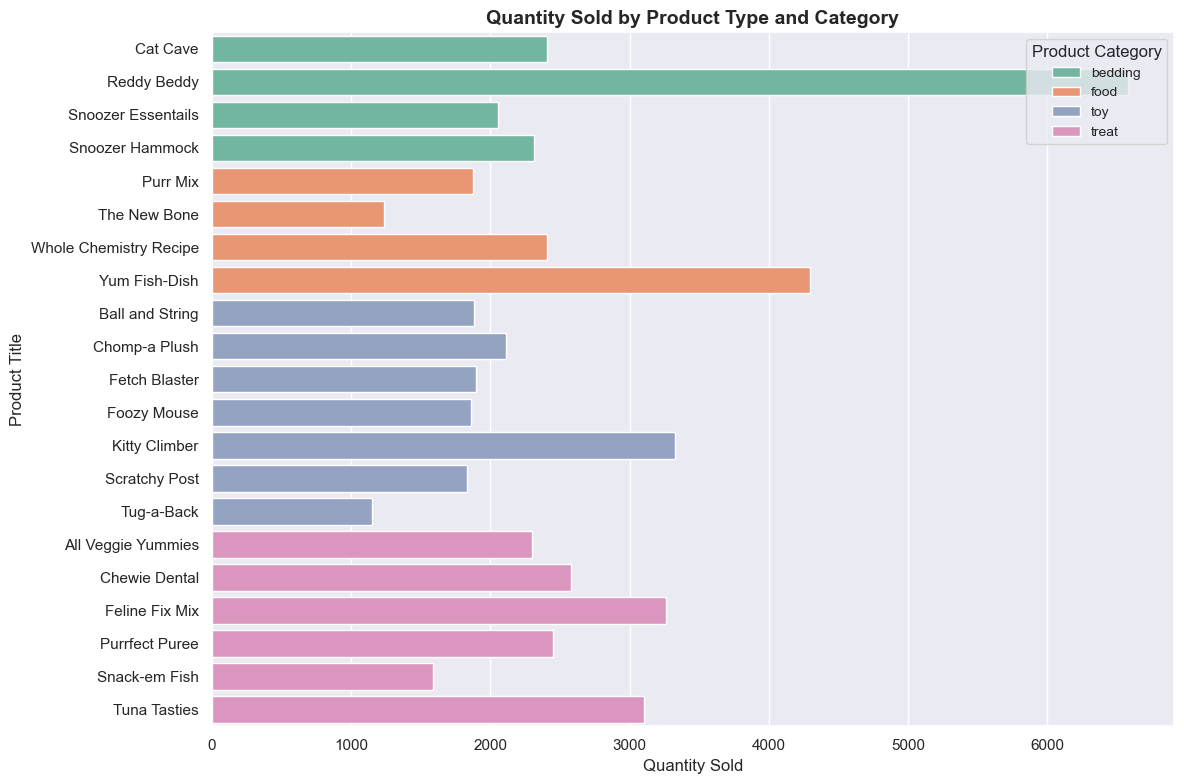

In [192]:
# Grouping by product category and title, then summing the quantity sold (trans_quantity)
quantity_by_category_and_product = df.groupby(['prod_category', 'prod_title'])['trans_quantity'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 8))

sns.barplot(
    x='trans_quantity',  # x-axis shows quantity sold
    y='prod_title',  # y-axis shows product titles
    hue='prod_category',  # Differentiate bars by product category
    data=quantity_by_category_and_product,
    palette='Set2'
)

# Add labels and title
plt.title('Quantity Sold by Product Type and Category', fontsize=14, fontweight='bold')
plt.xlabel('Quantity Sold', fontsize=12)
plt.ylabel('Product Title', fontsize=12)
plt.legend(title='Product Category', fontsize=10, loc='upper right')

# Display the plot
plt.tight_layout()  # Ensure the layout is well-adjusted
plt.show()

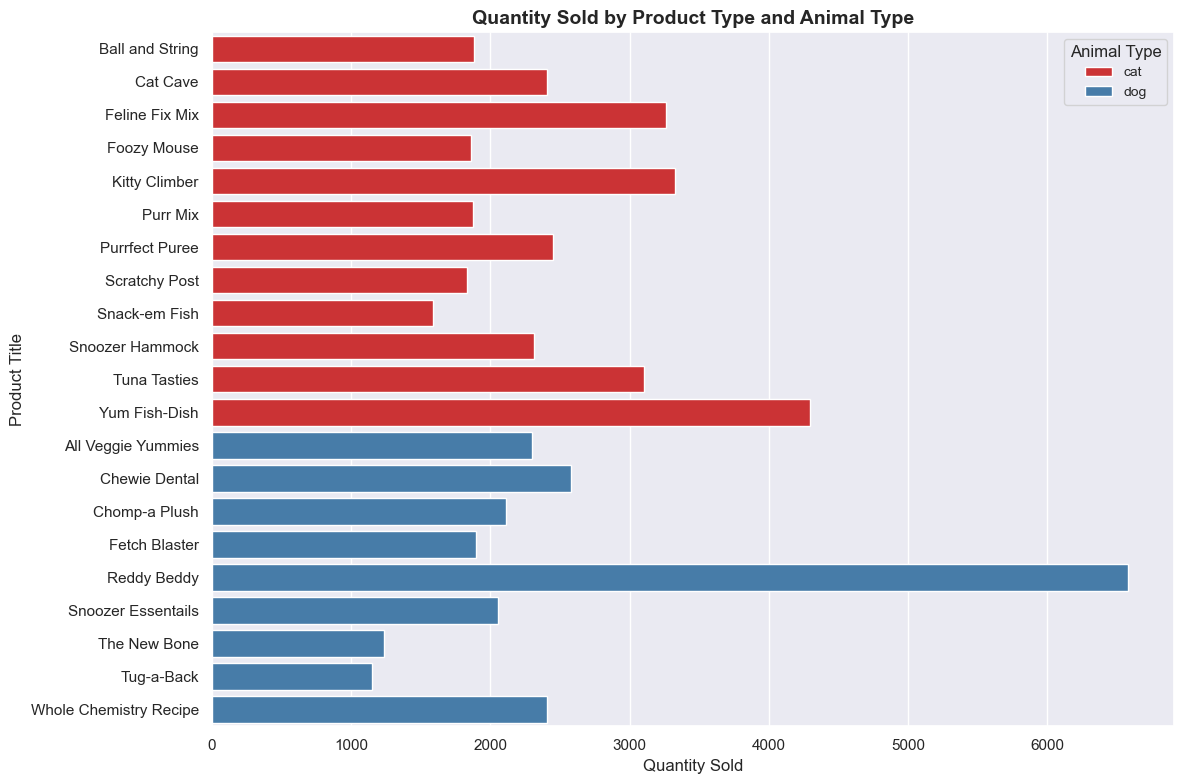

In [194]:
# Grouping by animal type and product title, then summing the quantity sold (trans_quantity)
quantity_by_animal_and_product = df.groupby(['prod_animal_type', 'prod_title'])['trans_quantity'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 8))

sns.barplot(
    x='trans_quantity',  # x-axis shows quantity sold
    y='prod_title',  # y-axis shows product titles
    hue='prod_animal_type',  # Differentiate bars by animal type (dog/cat)
    data=quantity_by_animal_and_product,
    palette='Set1'  # Color palette for dog/cat differentiation
)

# Add labels and title
plt.title('Quantity Sold by Product Type and Animal Type', fontsize=14, fontweight='bold')
plt.xlabel('Quantity Sold', fontsize=12)
plt.ylabel('Product Title', fontsize=12)
plt.legend(title='Animal Type', fontsize=10, loc='upper right')

# Display the plot
plt.tight_layout()  # Ensure the layout is well-adjusted
plt.show()

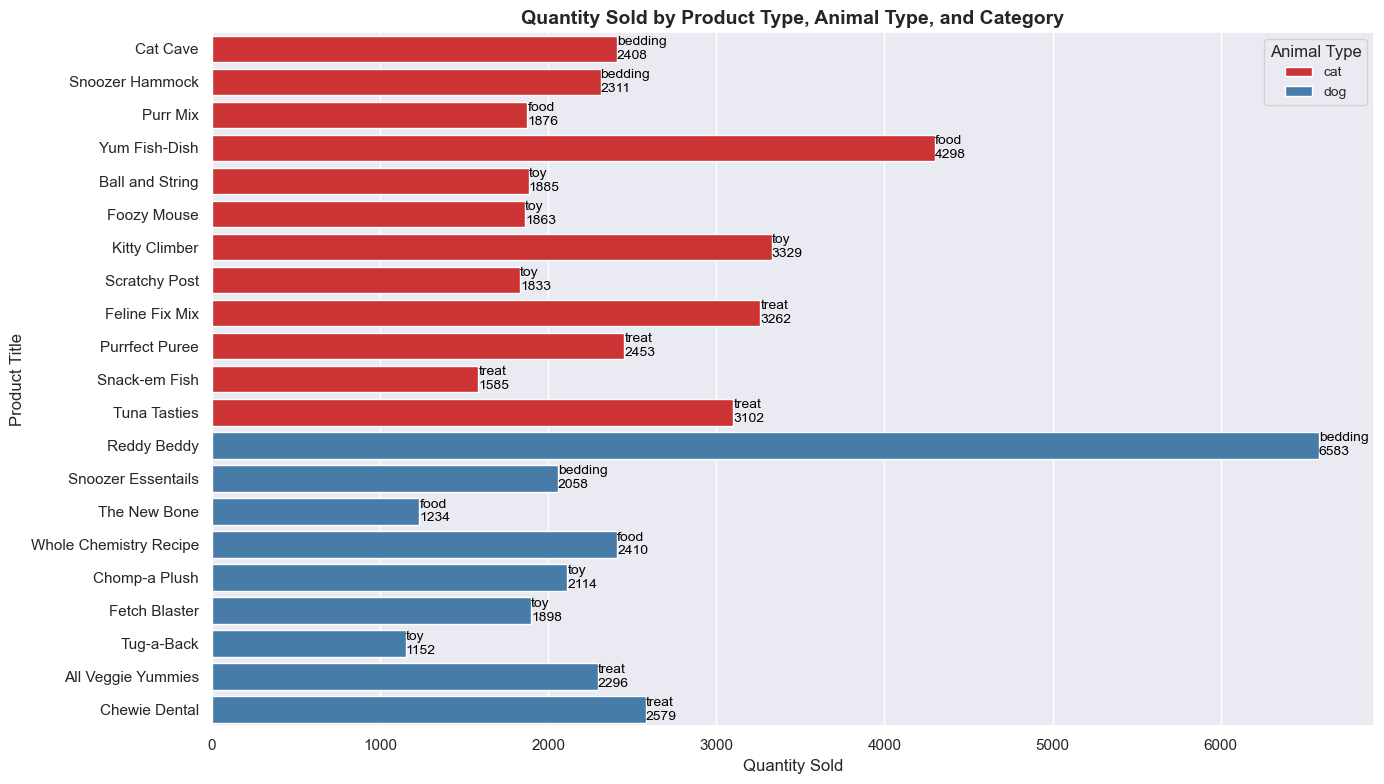

In [202]:
# Grouping by animal type, product category, and product title, then summing the quantity sold
quantity_by_animal_category_product = df.groupby(['prod_animal_type', 'prod_category', 'prod_title'])['trans_quantity'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(14, 8))

# Plot with hue set to 'prod_animal_type' to distinguish bars by animal type
sns.barplot(
    x='trans_quantity',  # x-axis shows quantity sold
    y='prod_title',  # y-axis shows product titles
    hue='prod_animal_type',  # Differentiate bars by animal type (dog/cat)
    data=quantity_by_animal_category_product,
    palette='Set1'  # Color palette for dog/cat differentiation
)

# Annotate each bar with the product category and quantity sold
for index, row in quantity_by_animal_category_product.iterrows():
    plt.text(
        row['trans_quantity'] + 0.2,  # Position of the text, slightly offset from the bar
        index,  # Position of the text along y-axis (based on index)
        f"{row['prod_category']}\n{row['trans_quantity']}",  # Category and quantity text
        color='black',  # Text color
        va='center',  # Vertical alignment of the text
        ha='left',  # Horizontal alignment of the text
        fontsize=10
    )

# Add labels and title
plt.title('Quantity Sold by Product Type, Animal Type, and Category', fontsize=14, fontweight='bold')
plt.xlabel('Quantity Sold', fontsize=12)
plt.ylabel('Product Title', fontsize=12)
plt.legend(title='Animal Type', fontsize=10, loc='upper right')

# Display the plot
plt.tight_layout()  # Ensure the layout is well-adjusted
plt.show()

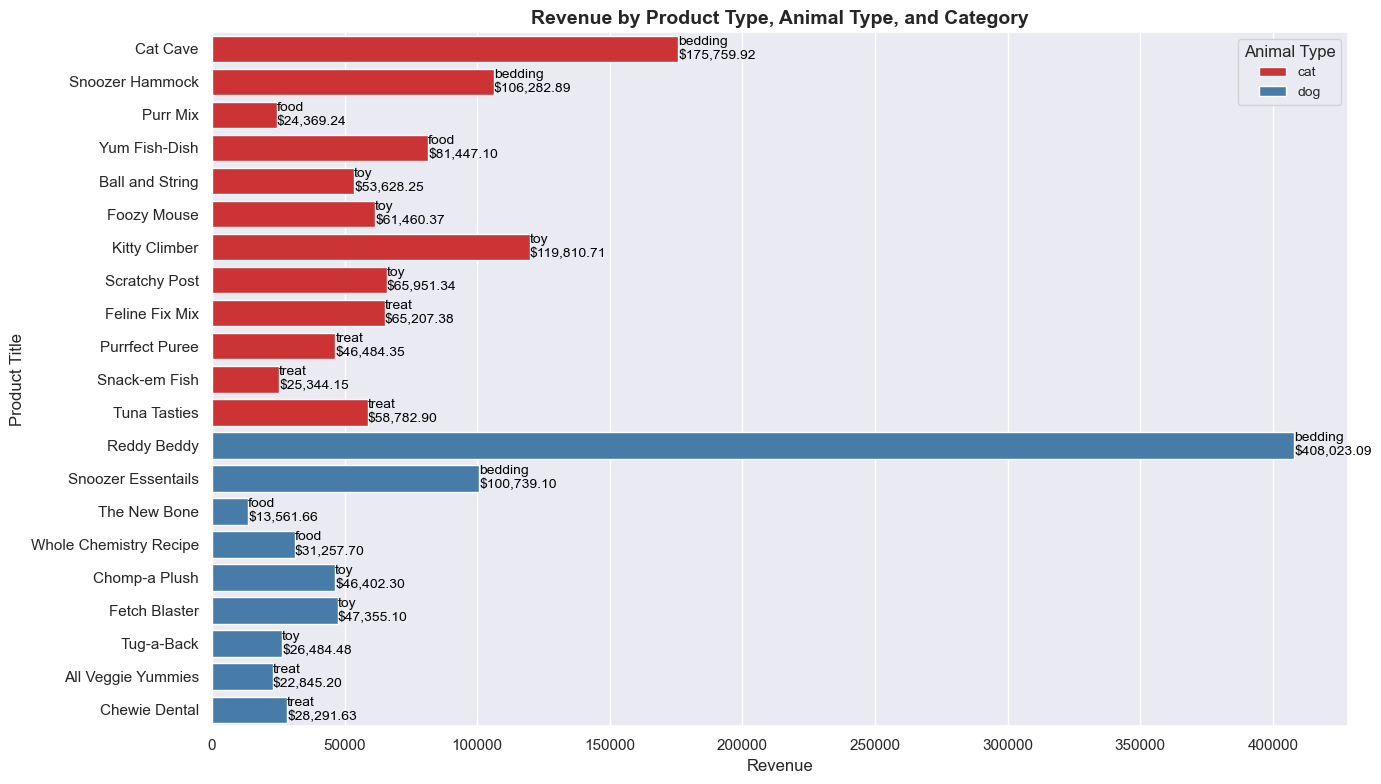

<Figure size 640x480 with 0 Axes>

In [227]:
# Grouping by animal type, product category, and product title, then summing the revenue
revenue_by_animal_category_product = df.groupby(['prod_animal_type', 'prod_category', 'prod_title'])['total_sales'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(14, 8))

# Plot with hue set to 'prod_animal_type' to distinguish bars by animal type
sns.barplot(
    x='total_sales',  # x-axis shows revenue
    y='prod_title',  # y-axis shows product titles
    hue='prod_animal_type',  # Differentiate bars by animal type (dog/cat)
    data=revenue_by_animal_category_product,
    palette='Set1'  # Color palette for dog/cat differentiation
)

# Annotate each bar with the product category and revenue
for index, row in revenue_by_animal_category_product.iterrows():
    plt.text(
        row['total_sales'] + 0.2,  # Position of the text, slightly offset from the bar
        index,  # Position of the text along y-axis (based on index)
        f"{row['prod_category']}\n${row['total_sales']:,.2f}",  # Category and formatted revenue text
        color='black',  # Text color
        va='center',  # Vertical alignment of the text
        ha='left',  # Horizontal alignment of the text
        fontsize=10
    )

# Add labels and title
plt.title('Revenue by Product Type, Animal Type, and Category', fontsize=14, fontweight='bold')
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Product Title', fontsize=12)
plt.legend(title='Animal Type', fontsize=10, loc='upper right')

# Display the plot
plt.tight_layout()  # Ensure the layout is well-adjusted
plt.show()

# Save the plot as a PNG file
plt.savefig('chart.png', format='jpg')

Revenue by Animal Type:
 prod_animal_type
cat    884528.60
dog    724960.26
Name: total_sales, dtype: float64


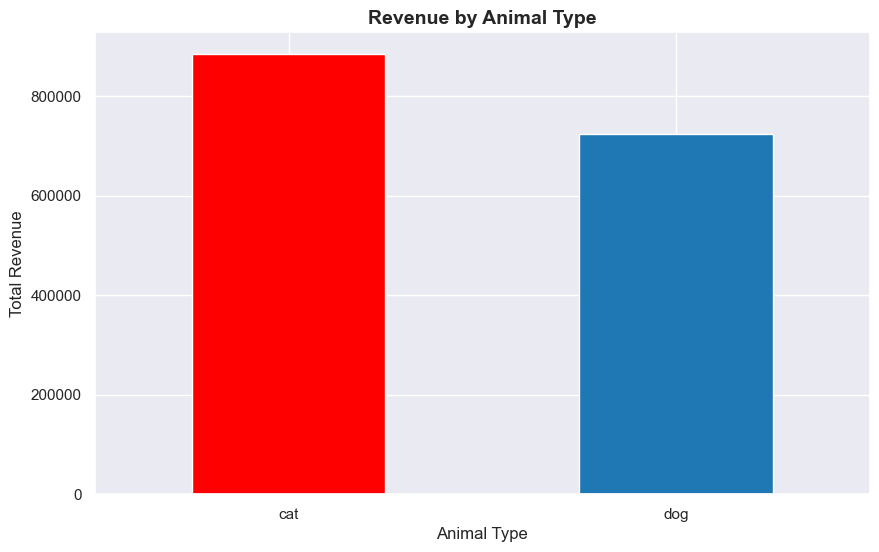

In [224]:
# Calculate revenue by Animal Type
Animal_type_revenue = df.groupby(['prod_animal_type'])['total_sales'].sum()

# Print results
print("Revenue by Animal Type:\n", Animal_type_revenue)

# Visualization with correct colors: Dog = blue, Cat = red
Animal_type_revenue.plot(kind='bar', figsize=(10, 6), color=['#ff0000', '#1f77b4'])  # Blue for dog, Red for cat
plt.title("Revenue by Animal Type", fontsize=14, fontweight='bold')
plt.xlabel("Animal Type", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=0)
plt.show()

## Trend Summary and Insights
Based on the 6-month sales data, we can observe the following trends:

Overall Sales Growth: Total sales show a consistent upward trend over the six months, indicating a positive growth trajectory. This could suggest increasing demand, improving market conditions, or successful marketing efforts driving higher sales volume.

Most Popular Products:

For Cats: The most popular product is 'Yum Fish-Dish', which has sold a total of 3,086 units over the six months. This suggests a strong preference for this specific product among cat owners, potentially indicating its alignment with customer needs or preferences.
For Dogs: The most popular product is 'Reddy Beddy', with 4,734 units sold. This higher volume of sales may indicate a higher demand for dog-related products or the effectiveness of promotional efforts specific to this product.
Category Performance:

The Beddings category is the highest grossing in terms of revenue, indicating that products in this category (likely including bedding for both dogs and cats) are key drivers of revenue.
Toys are the second-highest grossing category, indicating a strong market for pet toys, suggesting that pet owners are willing to invest in both comfort and entertainment for their pets.
Recommendations
Promote Best-Sellers:

Since 'Yum Fish-Dish' and 'Reddy Beddy' are the most popular products, consider running targeted promotions or advertisements to increase their visibility further. Special discounts, bundles, or loyalty programs focused on these items can capitalize on their popularity.
Invest in cross-selling opportunities between bedding and toys to create product bundles, leveraging the success of both categories.
Focus on Expanding the Beddings and Toys Categories:

Given that Beddings and Toys are the highest revenue-generating categories, continue to expand these product lines. Introducing new variations, styles, or special features in these categories could help maintain interest and increase sales.
Consider conducting customer surveys to gather insights on preferences for bedding and toys, which could help in further product development or customization.
Monitor and Boost Sales for Cats:

While 'Yum Fish-Dish' is performing well for cats, total sales volume is lower compared to the dog product category. Strategies to boost the sales of cat-related products could include expanding the product offering, promotional discounts, or targeted advertising campaigns to elevate interest in other cat-related items.
Data-Driven Campaigns:

Leverage the trend of increasing sales by continuing to track customer preferences and seasonal trends. Use predictive analytics to forecast demand for these products in upcoming months and plan marketing campaigns around anticipated growth.
Consider segmenting your audience based on pet ownership type (dog vs. cat) and tailoring your marketing messages and product offerings accordingly. This personalized approach could help increase conversion rates and customer loyalty.
Leverage High-Grossing Categories for Brand Positioning:

Position your brand as a leader in pet comfort and entertainment by promoting your Beddings and Toys categories. Highlight the quality, variety, and benefits of these products in your marketing campaigns to appeal to both new and existing customers.
By acting on these insights and recommendations, your business can continue to capitalize on the upward sales trend, optimize the performance of high-revenue categories, and improve engagement with both dog and cat product segments.